<a href="https://colab.research.google.com/github/raihann63/Codealpha_Handwritten-Character-Recognition/blob/main/CodeAlpha_Handwritten_Character_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 0: Imports + reproducibility
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

import warnings
warnings.filterwarnings("ignore")

# Optional (for confusion matrix visualization)
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# STEP 1: Load EMNIST CSV files (letters)
folder_path = '/content/drive/MyDrive/ML LAB CLASS/Alpha-report/EMNIST/emnist'


In [ ]:
train_csv = os.path.join(folder_path, 'emnist-letters-train.csv')
test_csv  = os.path.join(folder_path, 'emnist-letters-test.csv')

In [ ]:
# Load CSVs
train_data = pd.read_csv(train_csv, header=None)
test_data  = pd.read_csv(test_csv, header=None)

# First column = labels, rest 784 = pixels
xtrain = train_data.iloc[:, 1:].values
ytrain = train_data.iloc[:, 0].values
xtest  = test_data.iloc[:, 1:].values
ytest  = test_data.iloc[:, 0].values


In [ ]:
# STEP 2: Filter invalid labels (labels must be 1-26)
valid_train_idx = np.where((ytrain >= 1) & (ytrain <= 26))[0]
xtrain = xtrain[valid_train_idx]
ytrain = ytrain[valid_train_idx]

valid_test_idx = np.where((ytest >= 1) & (ytest <= 26))[0]
xtest = xtest[valid_test_idx]
ytest = ytest[valid_test_idx]

In [ ]:
xtrain.shape

(88800, 784)

In [ ]:
xtest.shape

(14800, 784)

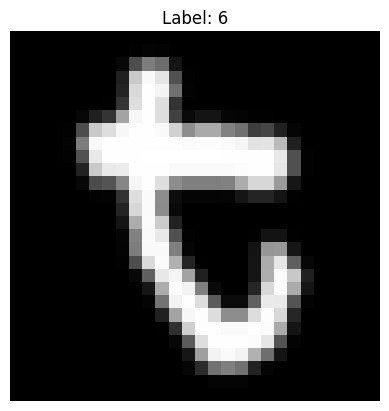

In [ ]:
# EMNIST letters dataset images reshape
img = xtrain[100].reshape(28,28)  # reshape 28x28
img = np.transpose(img)            # transpose
img = np.flip(img, axis=0)         # flip vertically

plt.imshow(img, cmap='gray')
plt.title(f"Label: {ytrain[100]}")
plt.axis('off')
plt.show()

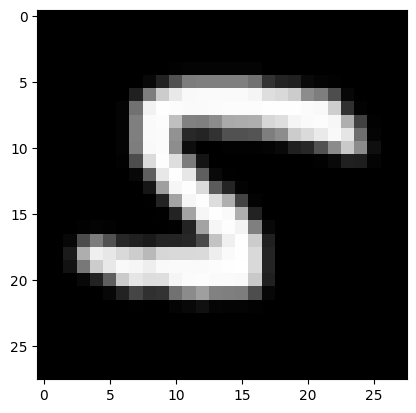

In [ ]:
plt.imshow(np.flip(np.transpose(xtrain[110].reshape(28,28)), axis=0), cmap='gray')

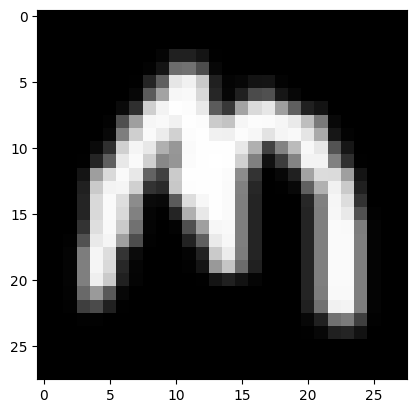

In [ ]:
plt.imshow(np.flip(np.transpose(xtrain[1000].reshape(28,28)), axis=0), cmap='gray')

In [ ]:
# STEP 3: Normalize pixel values (0-1) and reshape for CNN
xtrain = xtrain / 255.0
xtest  = xtest / 255.0

x_train_cnn = xtrain.reshape(-1, 28, 28, 1)
x_test_cnn  = xtest.reshape(-1, 28, 28, 1)

# One-hot encode labels (letters A-Z mapped 1-26)
num_classes = 26
y_train = keras.utils.to_categorical(ytrain - 1, num_classes)  # -1 to make 0-based
y_test  = keras.utils.to_categorical(ytest - 1, num_classes)

In [ ]:
# STEP 4: Build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [ ]:
# STEP 5: Compile
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# STEP 6: Train
history = cnn_model.fit(x_train_cnn, y_train,
                        epochs=8,          # Colab: 5-10 enough
                        batch_size=128,
                        validation_data=(x_test_cnn, y_test))


Epoch 1/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 71s 100ms/step - accuracy: 0.6843 - loss: 1.0756 - val_accuracy: 0.8808 - val_loss: 0.3711
Epoch 2/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 84s 103ms/step - accuracy: 0.9017 - loss: 0.3019 - val_accuracy: 0.8994 - val_loss: 0.2984
Epoch 3/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.9206 - loss: 0.2396 - val_accuracy: 0.9061 - val_loss: 0.2846
Epoch 4/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 68s 99ms/step - accuracy: 0.9339 - loss: 0.1991 - val_accuracy: 0.9066 - val_loss: 0.2782
Epoch 5/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 85s 103ms/step - accuracy: 0.9399 - loss: 0.1758 - val_accuracy: 0.9111 - val_loss: 0.2621
Epoch 6/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 70s 101ms/step - accuracy: 0.9449 - loss: 0.1571 - val_accuracy: 0.9105 - val_loss: 0.2597
Epoch 7/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 78s 96ms/step - accuracy: 0.9496 - loss: 0.1427 - val_accuracy: 0.9199 - val_loss: 0.2532
Epoch 8/8
694/694 ━━━━━━━━━━━━━━━━━━━━ 81s 95ms/step - accuracy: 0.9533 - loss: 0.1267 - val_

In [ ]:
# STEP 7: Evaluate
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test)
print("CNN Test Accuracy:", test_acc)


463/463 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9294 - loss: 0.2354
CNN Test Accuracy: 0.9216892123222351


463/463 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step


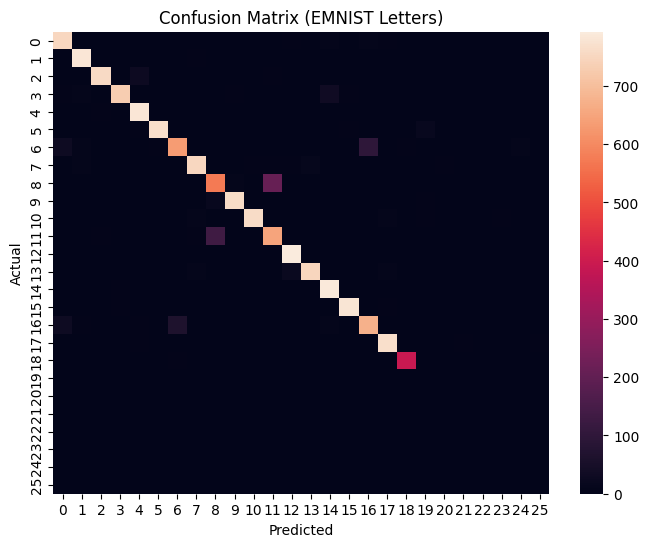

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       800
           1       0.95      0.98      0.96       800
           2       0.98      0.95      0.96       800
           3       0.98      0.91      0.94       800
           4       0.94      0.98      0.96       800
           5       0.98      0.96      0.97       800
           6       0.89      0.79      0.84       800
           7       0.96      0.94      0.95       800
           8       0.79      0.71      0.75       800
           9       0.97      0.95      0.96       800
          10       0.98      0.95      0.97       800
          11       0.74      0.81      0.77       800
          12       0.96      0.99      0.98       800
          13       0.97      0.94      0.95       800
          14       0.93      0.98      0.96       800
          15       0.97      0.97      0.97       800
          16       0.85      0.84      0.85       800
          17       0.95    

In [ ]:
# STEP 8: Confusion matrix + classification report
y_pred_proba = cnn_model.predict(x_test_cnn)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, fmt='d')
plt.title("Confusion Matrix (EMNIST Letters)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


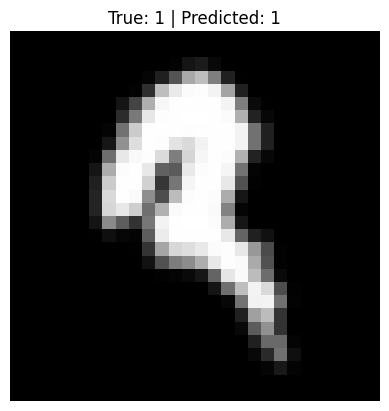

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


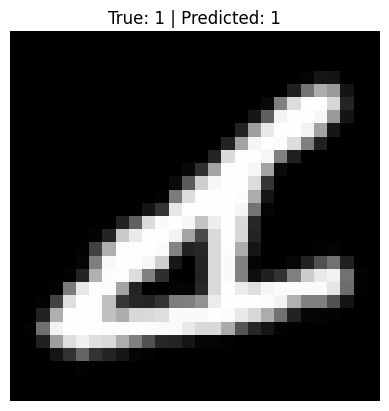

In [ ]:

num_test_samples = 2  # number of test images to visualize
for i in range(num_test_samples):
    img = x_test_cnn[i]               # shape: (28,28,1)
    img_input = np.expand_dims(img, axis=0)  # add batch dimension

    pred_proba = cnn_model.predict(img_input)
    pred_class = np.argmax(pred_proba, axis=1)[0] + 1  # +1 to match label (1-26)

    true_class = np.argmax(y_test[i]) + 1

    # Visualize
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_class} | Predicted: {pred_class}")
    plt.axis('off')
    plt.show()

In [ ]:
# Step 1: Predict on the test set
y_pred_proba = cnn_model.predict(x_test_cnn)  # probabilities
y_pred = np.argmax(y_pred_proba, axis=1) + 1   # +1 because letters A=1, B=2...
y_true = np.argmax(y_test, axis=1) + 1


463/463 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


#Testing Prediction

**visualize_letter**

In [ ]:
def visualize_letter(letter, x_data, y_true, y_pred, num_images=5):

    import matplotlib.pyplot as plt
    import numpy as np

    # Convert letter to index (0-based)
    index = ord(letter.upper()) - ord('A')  # 0 = A, 1 = B, ..., 25 = Z

    # Find all images with this letter in test set
    indices = np.where(y_true == index)[0]

    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(1, num_images, i+1)
        img = x_data[idx].reshape(28,28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {chr(y_pred[idx]+65)}")  # 0->A, 1->B,...
        plt.axis('off')
    plt.show()


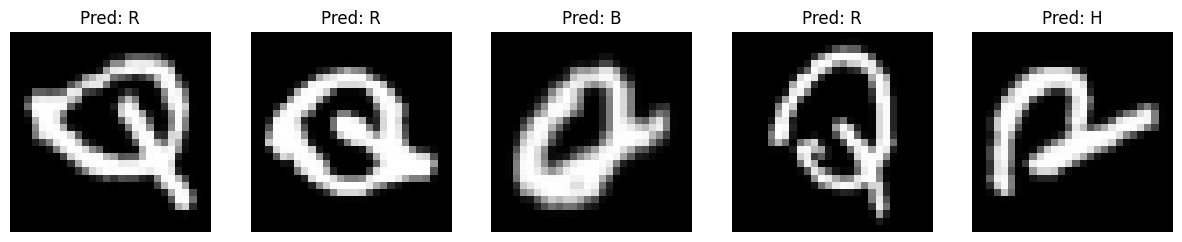

In [ ]:
visualize_letter('R', x_test_cnn, y_true, y_pred, num_images=5)

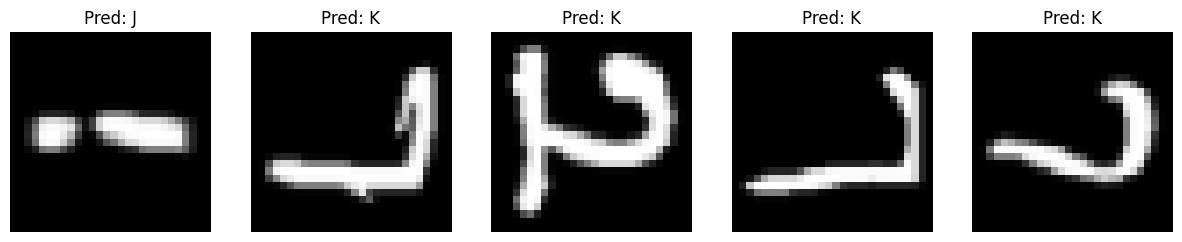

In [ ]:
visualize_letter('K', x_test_cnn, y_true, y_pred, num_images=5)

**visualize_digit**

In [ ]:
def visualize_digit(digit, x_data, y_true, y_pred, num_images=5):

    import matplotlib.pyplot as plt
    import numpy as np

    # Find all images with this digit in test set
    indices = np.where(y_true == digit)[0]

    plt.figure(figsize=(15,3))
    for i, idx in enumerate(indices[:num_images]):
        plt.subplot(1, num_images, i+1)
        img = x_data[idx].reshape(28,28)
        plt.imshow(img, cmap='gray')
        plt.title(f"Pred: {y_pred[idx]}")
        plt.axis('off')
    plt.show()


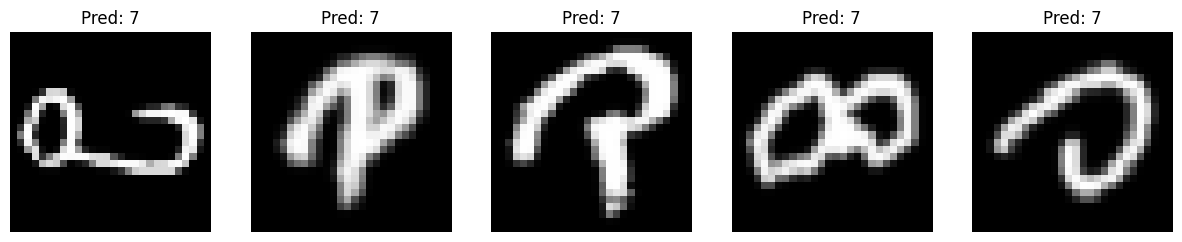

In [ ]:
visualize_digit(7, x_test_cnn, y_true, y_pred, num_images=5)

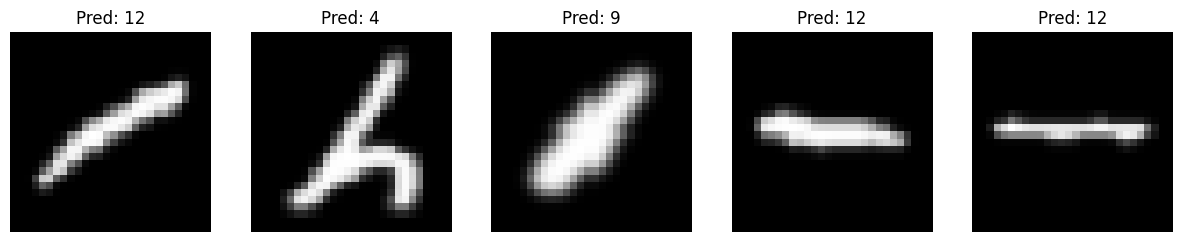

In [ ]:
visualize_digit(9, x_test_cnn, y_true, y_pred, num_images=5)